# 計算及繪製混淆矩陣

## 載入套件

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 載入資料

In [27]:
df = pd.read_csv('./data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 觀察目標變數的各類別筆數

In [28]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

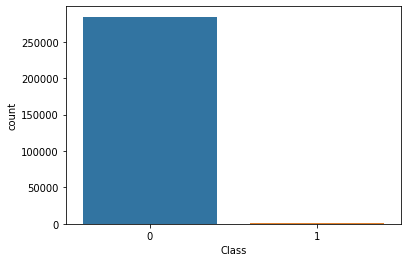

In [29]:
sns.countplot(x='Class', data=df);

## 模型訓練與預測

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = df.drop(['Time', 'Amount', 'Class'], axis=1), df['Class']

# 分割資料
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 模型訓練
clf = LogisticRegression().fit(X_train, y_train)

# 預測
y_pred = clf.predict(X_test)

# 準確率
accuracy_score(y_test, y_pred)

0.9992977725344794

## 計算混淆矩陣

In [31]:
# 取得混淆矩陣的4個格子
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(71072, 10, 40, 80)

## 常用的效能衡量指標計算

In [32]:
print(f'準確率(Accuracy)={(tn+tp) / (tn+fp+fn+tp)}')
print(f'精確率(Precision)={(tp) / (fp+tp)}')
print(f'召回率(Recall)={(tp) / (fn+tp)}')
print(f'F1 score={(2*tp) / (2*tp+fp+fn)}')

準確率(Accuracy)=0.9992977725344794
精確率(Precision)=0.8888888888888888
召回率(Recall)=0.6666666666666666
F1 score=0.7619047619047619


## Scikit-learn 分類報表

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.89      0.67      0.76       120

    accuracy                           1.00     71202
   macro avg       0.94      0.83      0.88     71202
weighted avg       1.00      1.00      1.00     71202



In [34]:
# weighted average 驗算
(1.00 * 71082 + 0.89 * 120) / (71082 + 120)

0.9998146119491026

## 多類別的分類報表

In [35]:
# 3 類別
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1
           2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



## 多類別的分類報表

In [39]:
# 3 類別
y_pred = [1, 2, 0]
y_true = [1, 1, 1]
print(classification_report(y_true, y_pred, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       1.00      0.33      0.50         3
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.50      0.33      0.40         3
   macro avg       0.33      0.11      0.17         3
weighted avg       1.00      0.33      0.50         3



C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Rec